### Access data

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [1]:
pip install -r /workspace/fraud-analysis/requirements.txt

  Using cached pandas-1.4.2-cp312-cp312-linux_x86_64.whl
  Using cached matplotlib-3.3.1.tar.gz (38.8 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-wj_n9o6x/matplotlib_5ae7a7030987416d93f82d003b236dd2/setup.py", line 52, in <module>
          __version__ = versioneer.get_version()
                        ^^^^^^^^^^^^^^^^^^^^^^^^
        File "/tmp/pip-install-wj_n9o6x/matplotlib_5ae7a7030987416d93f82d003b236dd2/versioneer.py", line 1410, in get_version
          return get_versions()["version"]
                 ^^^^^^^^^^^^^^
        File "/tmp/pip-install-wj_n9o6x/matplotlib_5ae7a7030987416d93f82d003b236dd2/versioneer.py", line 1344, in get_versions
          cfg = get_con

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/fraud-analysis/Jupyter-Notebooks'

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/fraud-analysis'

### Remove Customer ID and Transaction ID from the data frame as these are not relevant measures

In [6]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/Fraudulent_E-Commerce_Transactions.csv")
    .drop(['Customer ID', 'Transaction ID', ], axis=1)
    )
df.head(3)

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction Amount  1472952 non-null  float64
 1   Transaction Date    1472952 non-null  object 
 2   Payment Method      1472952 non-null  object 
 3   Product Category    1472952 non-null  object 
 4   Quantity            1472952 non-null  int64  
 5   Customer Age        1472952 non-null  int64  
 6   Customer Location   1472952 non-null  object 
 7   Device Used         1472952 non-null  object 
 8   IP Address          1472952 non-null  object 
 9   Shipping Address    1472952 non-null  object 
 10  Billing Address     1472952 non-null  object 
 11  Is Fraudulent       1472952 non-null  int64  
 12  Account Age Days    1472952 non-null  int64  
 13  Transaction Hour    1472952 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 157.3+ MB


In [8]:
pip install ydata-profiling

  Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata (20 kB)
  Using cached scipy-1.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.8.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached pydantic-2.7.1-py3-none-any.whl.metadata (107 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached multimethod-1.11.2-py3-none-any.whl.metadata (9.1 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached typeguard-4.2.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.3-cp312-cp312-manylinux_2_1

In [9]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('outputs/datasets/collection/Fraudulent_E-Commerce_Transactions.csv')
profile = ProfileReport(df, title="Profiling Report")

/home/gitpod/.pyenv/versions/3.12.3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
fraud_data_1 = pd.read_csv("/workspace/fraud-analysis/outputs/datasets/collection/Fraudulent_E-Commerce_Transactions.csv")

## Payment method distribution

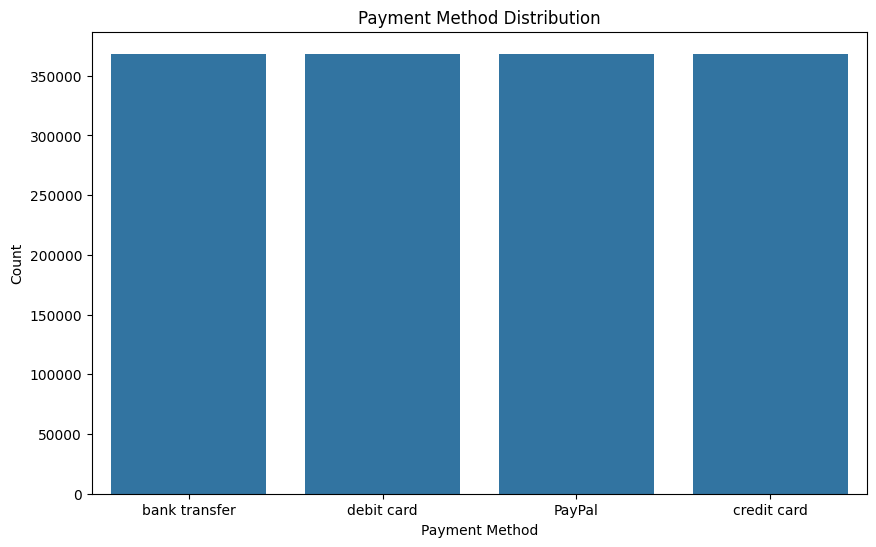

In [11]:
# Payment Method Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data_1, x='Payment Method')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

## Number of fraudulent transaction 

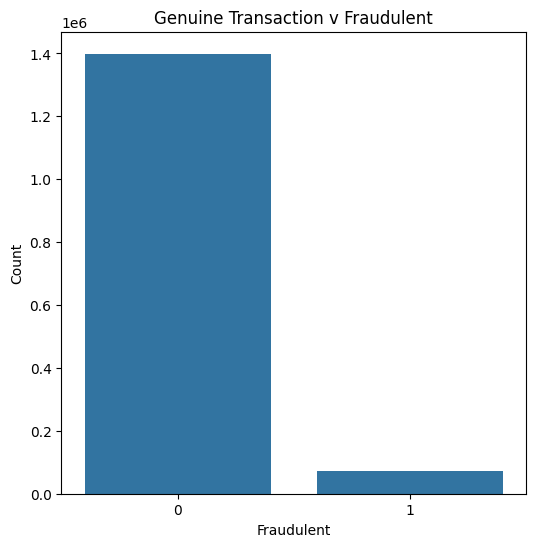

In [12]:
# Fraud vs Genuine 
plt.figure(figsize=(6, 6))
sns.countplot(data=fraud_data_1, x='Is Fraudulent')
plt.title('Genuine Transaction v Fraudulent')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

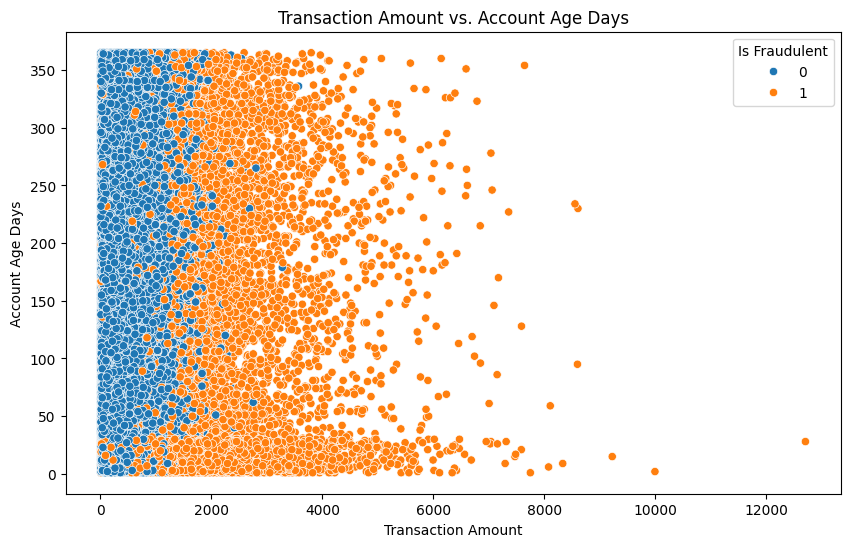

In [13]:
# Fraudulent/Genuine transactions compared with age of account
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fraud_data_1, x='Transaction Amount', y='Account Age Days', hue='Is Fraudulent')
plt.title('Transaction Amount vs. Account Age Days')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Age Days')
plt.show()

In [14]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [15]:
df['Address Match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)

In [16]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5,1
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8,1
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3,1
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20,1
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5,1


In [17]:
# Fraud with or without matching address - Need to coerce the data to work for address match
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fraud_data_1, x='Payment Method', y='Address Match', hue='Is Fraudulent')
plt.title('Payment Method v Address Match')
plt.xlabel('Payment Method')
plt.ylabel('Address Match')
plt.show()

ValueError: Could not interpret value `Address Match` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

Age V fraud

Category v fraud

Amount v fraud

payment method v fraud

age of account v fraud

address match v fraud

device used v fraud